In [117]:
#Importation des librairies indispensables
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Pour ignorer les avertissements
import warnings
warnings.filterwarnings("ignore")

In [40]:
#Lecture des données
data = pd.read_csv('car data.csv')

In [41]:
#Aperçu des données
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
#Nbre de lignes et colonnes 
nbre_lignes = data.shape[0]
nbre_colonnes = data.shape[1]
print(f"Il y' a {nbre_lignes} lignes et {nbre_colonnes} colonnes.")

Il y' a 301 lignes et 9 colonnes.


In [16]:
#Combien de valeurs uniques avons nous dans les variables catégorielles
print(data['Fuel_Type'].unique())
print(data['Seller_Type'].unique())
print(data['Transmission'].unique())
print(data['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [17]:
#Verifier les valeurs manquantes ou les valeurs nulles
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [18]:
#Voir les quelques stats rapides
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [19]:
data.describe(include='object')

,Car_Name,Fuel_Type,Seller_Type,Transmission
count,301,301,301,301
unique,98,3,2,2
top,city,Petrol,Dealer,Manual
freq,26,239,195,261


In [27]:
#Afficher les colonnes du dataset sous forme de liste
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [42]:
#Selectionner uniquement les colonnes importantes pour notre projet
final_data = data.drop(columns='Car_Name')

In [43]:
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [44]:
#Dans un dataset, si nous avons une colonne 'Year', il est important d'ajouter une colonne
#Pour l'Age
# Age = Current_year - year
#Pour ce faire, ajoutons la colonne pour l'année actuelle
final_data['Current_Year'] = 2023
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023


In [45]:
#Calculer maintenant le nombre d'années ou l'age des véhicules 
final_data['Number_Of_Year'] = final_data['Current_Year'] - final_data['Year']

In [46]:
final_data.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Number_Of_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2023,9
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2023,10
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2023,6
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2023,12
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2023,9


In [47]:
# Vu que nous avons déjà l'age du véhicule alors
#On peut supprimer les colonnes Year et Current_Year
final_data.drop(columns=['Year','Current_Year'],inplace=True)

In [48]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [51]:
#Maitenant nous allons transformer valeurs catégoriques en valeurs numériques 
from sklearn.preprocessing import LabelEncoder

# une instance de LabelEncoder
le = LabelEncoder()
# Appliquez le LabelEncoder à chaque colonne 
final_data['Fuel_Type'] = le.fit_transform(final_data['Fuel_Type'])
final_data['Seller_Type'] = le.fit_transform(final_data['Seller_Type'])
final_data['Transmission'] = le.fit_transform(final_data['Transmission'])

In [52]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Year
0,3.35,5.59,27000,2,0,1,0,9
1,4.75,9.54,43000,1,0,1,0,10
2,7.25,9.85,6900,2,0,1,0,6
3,2.85,4.15,5200,2,0,1,0,12
4,4.60,6.87,42450,1,0,1,0,9


In [62]:
# Calculer la matrice de corrélation 
matrice_correlation = final_data.corr()

In [63]:
# Sélectionner les paires de variables fortement corrélées (exemple : corrélation absolue > 0.35)
paire_fortement_corr = (matrice_correlation.abs() > 0.35) & (matrice_correlation.abs() < 1)

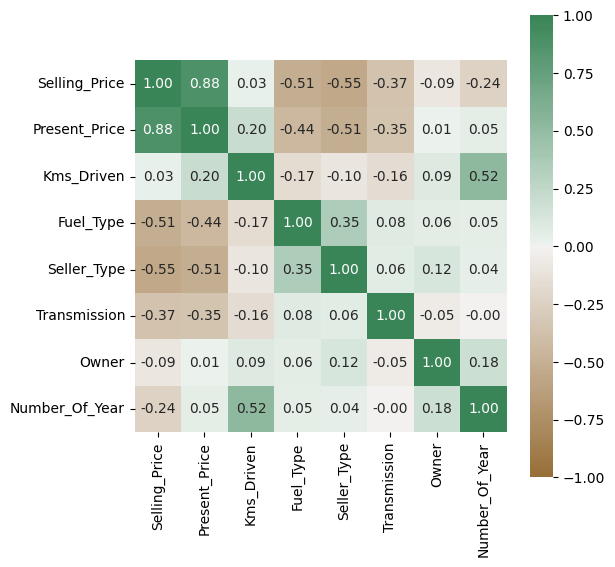

In [71]:
# Visualiser la matrice de corrélation avec un heatmap
plt.figure(figsize=(6,6)) 
sns.heatmap(matrice_correlation, annot=True, cmap=sns.diverging_palette(50, 500, n=500),
            fmt=".2f",vmin=-1, vmax=1, center=0,square=True)
plt.show()

In [76]:
final_data.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Year
0,3.35,5.59,27000,2,0,1,0,9
1,4.75,9.54,43000,1,0,1,0,10
2,7.25,9.85,6900,2,0,1,0,6
3,2.85,4.15,5200,2,0,1,0,12
4,4.60,6.87,42450,1,0,1,0,9


In [82]:
# Variables independantes X, variable dependante Y
X = final_data.iloc[:,1:]
y = final_data.iloc[:,0]

In [86]:
X.head()

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Year
0,5.59,27000,2,0,1,0,9
1,9.54,43000,1,0,1,0,10
2,9.85,6900,2,0,1,0,6
3,4.15,5200,2,0,1,0,12
4,6.87,42450,1,0,1,0,9


In [84]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [88]:
#Feature Importance
#Si nous avons un grand nombre de colonnes, on peut utiliser cette fonction
#Pour selectionner les colonnes importantes pour notre projet

In [89]:
# Importe la classe ExtraTreesRegressor du module ensemble de la bibliothèque scikit-learn
from sklearn.ensemble import ExtraTreesRegressor

# Crée une instance du modèle ExtraTreesRegressor
model = ExtraTreesRegressor() 

# Entraîne le modèle Extra Trees sur les données d'entraînement
# X représente les caractéristiques d'entraînement
# y représente les valeurs cibles associées
model.fit(X, y)

ExtraTreesRegressor()

In [100]:
X.head(3)

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_Of_Year
0,5.59,27000,2,0,1,0,9
1,9.54,43000,1,0,1,0,10
2,9.85,6900,2,0,1,0,6


In [92]:
#Afficher les variables importantes
print(model.feature_importances_)

[4.25961393e-01 4.05447554e-02 1.48155888e-01 2.23283878e-01
 8.41366487e-02 2.58217596e-04 7.76592194e-02]


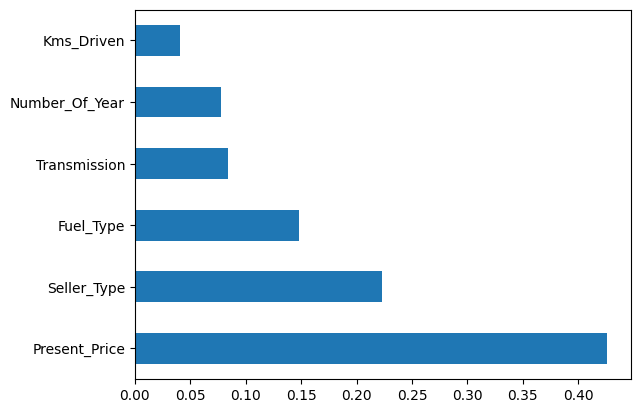

In [106]:
#Tracer un graphe de variables importantes pour une meilleure visualisation
feat_importances = pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(6).plot(kind='barh') # Selection de 5 variables les plus importantes
plt.show()

In [125]:
X.drop(columns='Owner',inplace=True)

In [127]:
#Diviser les données initiales en deux ensembles distincts : 
# un ensemble d'entraînement (train set) et un ensemble de test (test set).
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [128]:
# IMPLEMENTATION DU MODEL RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor() # Une instance du modèle 

In [129]:
from sklearn.model_selection import RandomizedSearchCV

In [130]:
# Reglages des Hyperparamètres
# Numbers of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

# Numbers of features to consider at every split
max_features = ['auto','sqrt']

# Maximum  number  of level  in tree
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=7)]

# Minimum number of samples required to split a node
min_samples_split = [int(x)for x in np.linspace(start=2,stop=100,num=7)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x)for x in np.linspace(1,10,7)]

In [131]:
#Create the random grid

random_grid = {
    'n_estimators' : n_estimators,
    'max_features' : max_features,
    'max_depth': max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf  
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 9, 13, 17, 21, 25, 30], 'min_samples_split': [2, 18, 34, 51, 67, 83, 100], 'min_samples_leaf': [1, 2, 4, 5, 7, 8, 10]}


In [132]:
# Use the random grid to search for best hyperparameters
# First,create the base model to tune

rf = RandomForestRegressor()

In [133]:
random_forest_model = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,
                                         scoring='neg_mean_squared_error',
                                        n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=2)

In [134]:
random_forest_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=2,
                   param_distributions={'max_depth': [5, 9, 13, 17, 21, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 5, 7, 8,
                                                             10],
                                        'min_samples_split': [2, 18, 34, 51, 67,
                                                              83, 100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [135]:
#Make a prediction
prediction = random_forest_model.predict(X_test)
prediction

array([ 1.36931494,  8.68897664,  5.58075434,  0.42762412,  6.98495062,
        6.7841891 ,  0.95530377,  0.72208851,  0.6460397 ,  6.06883048,
        8.54079703,  0.86731135,  7.57390098,  1.50129705,  5.81094823,
        3.2601801 ,  0.9673803 ,  9.35492216,  0.91110287,  1.24454429,
        0.59840674,  8.10419925,  5.97215026,  3.02979978,  0.55661598,
        3.77163927,  4.89631041,  3.42981635,  1.26015357,  1.05001951,
        0.629897  ,  8.76048475,  0.46313398,  3.17766136,  7.63966387,
        4.31972805,  6.27993911,  5.81151201,  3.23604878,  6.06276167,
        5.22281481,  5.88728532,  4.70045476,  0.57692694,  7.11213484,
        0.65300579,  7.02297957,  8.27812695,  3.24474392,  4.99455655,
        6.23841374,  1.25736073, 18.44054244, 17.63281486,  6.74364761,
        8.9301144 ,  5.28645592,  8.42047389,  3.28647399,  7.68265848,
        0.41606031])

<Axes: xlabel='Selling_Price', ylabel='Density'>

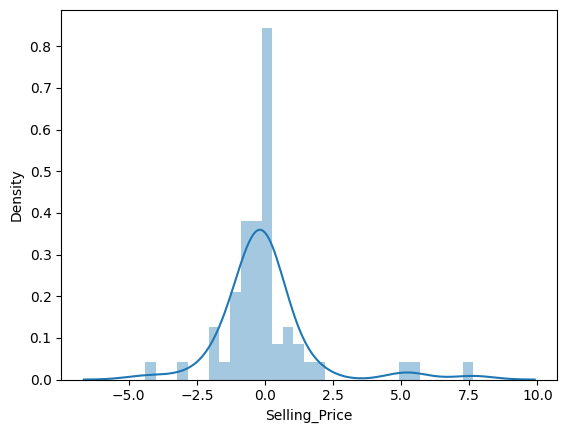

In [140]:
sns.distplot(y_test-prediction)

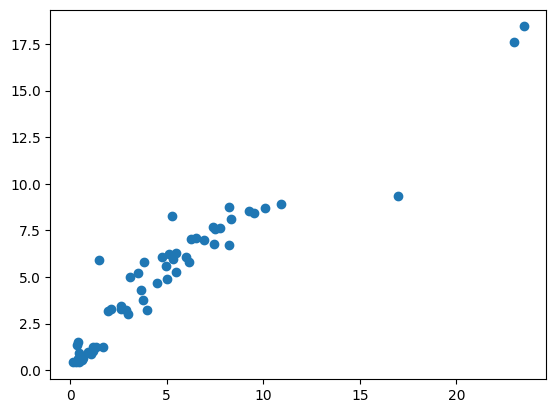

In [138]:
plt.scatter(y_test,prediction)

In [142]:
#Enregistrer le modele
import pickle
file = open('random_forest_regression_model.pkl','wb')
#dump information to that file
pickle.dump(random_forest_model,file)

In [164]:
X_train

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Number_Of_Year
184,0.750,26000,2,1,1,15
132,0.950,3500,2,1,1,6
194,0.787,50000,2,1,1,15
75,6.800,36000,2,0,1,8
111,1.500,8700,2,1,1,7
...,...,...,...,...,...,...
188,0.570,18000,2,1,1,10
71,12.480,45000,1,0,1,12
106,3.450,16500,2,1,1,9
270,10.000,69341,2,0,1,12
